In [151]:
#!pip install pickle5

In [152]:
!pip install update pickle
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import utm
from sklearn.preprocessing import StandardScaler


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [165]:
#from google.colab import drive
#drive.mount('/content/drive')
#!ls drive/'My Drive'
drive_path = 'C:/Users/simon/Nextcloud2/Master/Deep Learning/assignment/'
data_path = drive_path + "dataset_smol_boi_no_split_no_shuffle.pickle"
original_data_path = drive_path + "data_0.pickle"

with open(data_path, "rb") as fh:
  df_clean = pickle.load(fh)
  
with open(original_data_path, "rb") as fh:
  data = pickle.load(fh)

Text(0, 0.5, 'IRI mean')

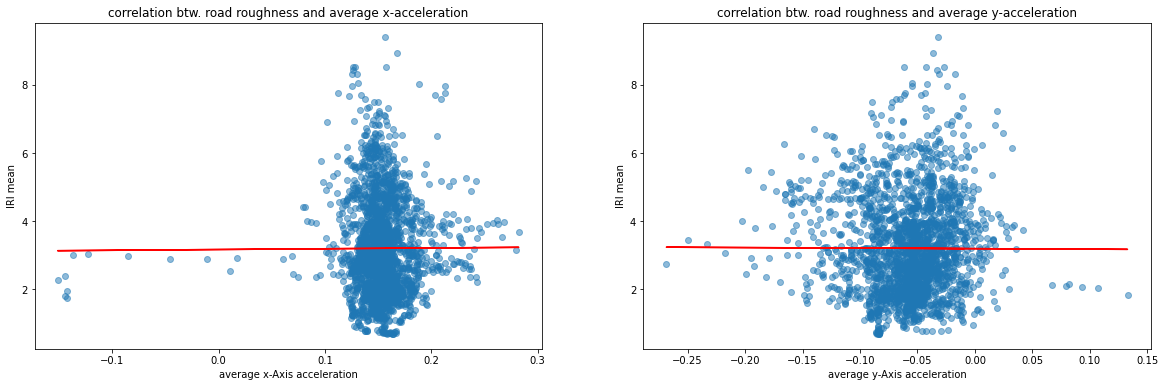

In [166]:
x_accel_mean = list()
for d in data["GM.acc.xyz.x"].to_numpy():
    x_accel_mean.append(d.mean())
y_accel_mean = list()
for d in data["GM.acc.xyz.y"].to_numpy():
    y_accel_mean.append(d.mean())
    
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,6))

m, b = np.polyfit(np.array(x_accel_mean,dtype=float),data["IRI_mean"].to_numpy(dtype=float), 1)
ax1.plot(np.array(x_accel_mean,dtype=float), m*np.array(x_accel_mean,dtype=float) + b,"r")
ax1.scatter(x_accel_mean,data["IRI_mean"].to_numpy(),alpha=0.5)
ax1.set_title("correlation btw. road roughness and average x-acceleration")
ax1.set_xlabel("average x-Axis acceleration")
ax1.set_ylabel("IRI mean")

m, b = np.polyfit(np.array(y_accel_mean,dtype=float),data["IRI_mean"].to_numpy(dtype=float), 1)
ax2.plot(np.array(y_accel_mean,dtype=float), m*np.array(y_accel_mean,dtype=float) + b,"r")
ax2.scatter(y_accel_mean,data["IRI_mean"].to_numpy(),alpha=0.5)
ax2.set_title("correlation btw. road roughness and average y-acceleration")
ax2.set_xlabel("average y-Axis acceleration")
ax2.set_ylabel("IRI mean")

# Visualisation of smoothing and interpolation process

Text(0.5, 1.0, 'original speed data with length (461,)')

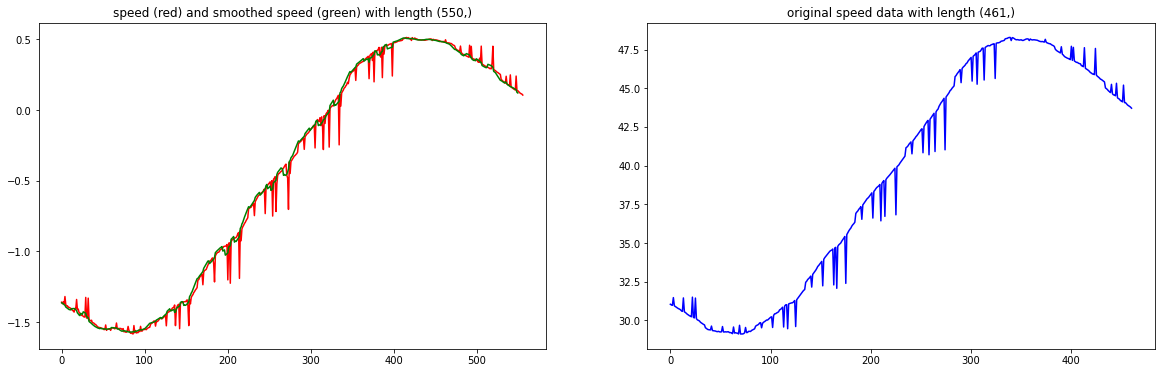

In [167]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,6))
ax1.plot(df_clean["v"].iloc[0],c="r")
ax2.plot(data["GM.obd.spd_veh.value"].iloc[0],c="b")
ax1.plot(df_clean["v_smooth"].iloc[0],c="g")
ax1.set_title(f'speed (red) and smoothed speed (green) with length {df_clean["v_smooth"][0].shape}')
ax2.set_title(f'original speed data with length {data["GM.obd.spd_veh.value"][0].shape}')

Text(0.5, 1.0, 'original acceleration data')

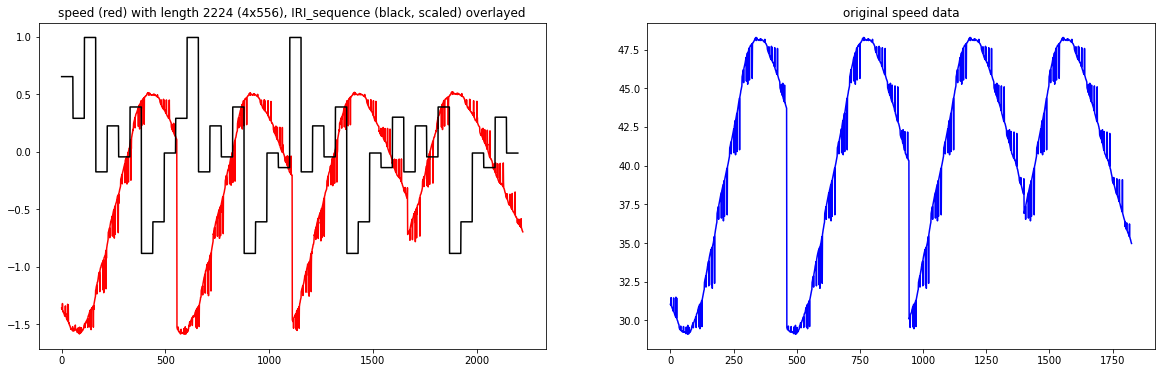

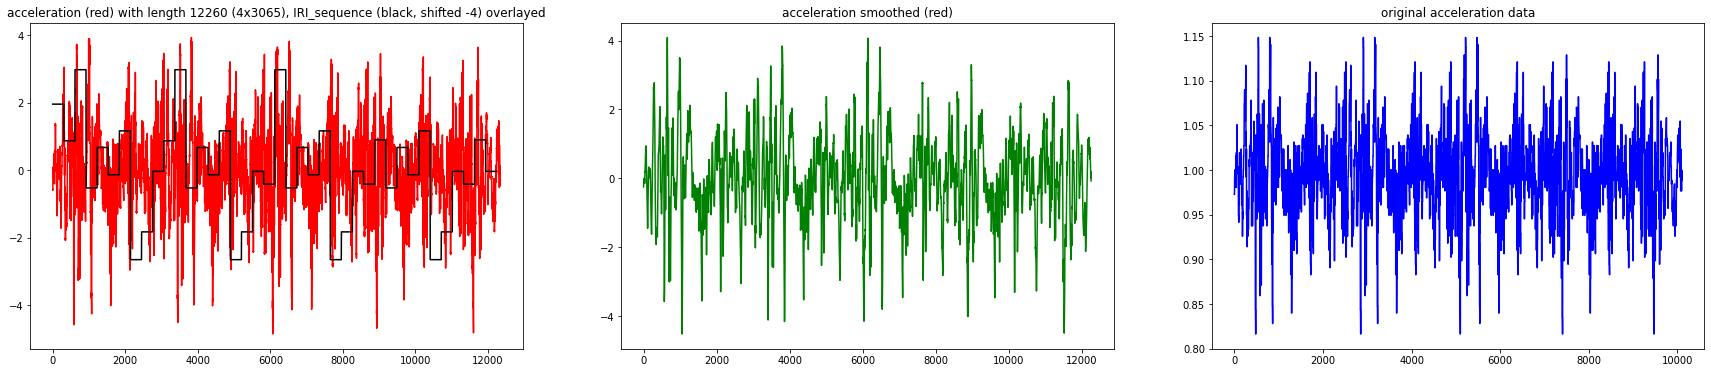

In [168]:
import itertools

iri_sequ_v,iri_sequ_z = [],[]
for k in range(4):
    iri_sequ_v.extend(list(itertools.chain(*[[df_clean["IRI_Sequence"][k][i]]*55 for i in range(10)])))
    iri_sequ_z.extend(list(itertools.chain(*[[df_clean["IRI_Sequence"][k][i]]*306 for i in range(10)])))


iri_sequ_v = (iri_sequ_v-np.mean(iri_sequ_v))/3
iri_sequ_z-=np.mean(iri_sequ_z)

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,6))
ax1.plot(np.concatenate((df_clean["v"][0],df_clean["v"][1],df_clean["v"][2],df_clean["v"][3])),c="r")
ax1.plot(iri_sequ_v,c="black")

ax2.plot(np.concatenate((data["GM.obd.spd_veh.value"].iloc[0],data["GM.obd.spd_veh.value"].iloc[1],data["GM.obd.spd_veh.value"].iloc[2],data["GM.obd.spd_veh.value"].iloc[3])),c="b")
ax1.set_title(f'speed (red) with length {df_clean["v"][0].shape[0]*4} (4x{df_clean["v"][0].shape[0]}), IRI_sequence (black, scaled) overlayed')
ax2.set_title(f'original speed data')


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(30,6))

ax1.plot(np.concatenate((df_clean["z"][0],df_clean["z"][1],df_clean["z"][2],df_clean["z"][3])),c="r")
ax1.plot(iri_sequ_z,c="black")

ax3.plot(np.concatenate((data["GM.acc.xyz.z"].iloc[0],data["GM.acc.xyz.z"].iloc[1],data["GM.acc.xyz.z"].iloc[2],data["GM.acc.xyz.z"].iloc[3])),c="b")
ax2.plot(np.concatenate((df_clean["z_smooth"][0],df_clean["z_smooth"][1],df_clean["z_smooth"][2],df_clean["z_smooth"][3])),c="g")
ax1.set_title(f'acceleration (red) with length {df_clean["z_smooth"][0].shape[0]*4} (4x{df_clean["z_smooth"][0].shape[0]}), IRI_sequence (black, shifted -4) overlayed')
ax2.set_title(f'acceleration smoothed (red)')
ax3.set_title(f'original acceleration data')


In [172]:
data.shape[0]-df_clean.shape[0]

745

In [173]:
df_clean.head(5)
shape_z = np.array([df_clean["z"][i].shape for i in range(df_clean["z"].shape[0])])
print("Average length of z-acc: {}, std of lengths z-acc: {}".format(shape_z.mean(),shape_z.std()))
shape_v = np.array([df_clean["v"][i].shape for i in range(df_clean["v"].shape[0])])
print("Average length of vel: {}, std of lengths vel: {}".format(shape_v.mean(),shape_v.std()))
print("Rows dropped from original dataframe: {}".format(data.shape[0]-df_clean.shape[0]))
ls_v = np.array([df_clean["v"][i] for i in range(df_clean["v"].shape[0])])
ls_vs = np.array([df_clean["v_smooth"][i] for i in range(df_clean["v_smooth"].shape[0])])

ls_z = np.array([df_clean["z"][i] for i in range(df_clean["z"].shape[0])])
ls_zs = np.array([df_clean["z_smooth"][i] for i in range(df_clean["z_smooth"].shape[0])])

print(f"Max Value of z:{ls_z.max()}, min: {ls_z.min()}, std: {ls_z.std()}, mean: {ls_z.mean()}, 90 percentile: {np.percentile(ls_z,90)}")
print(f"Max Value of v:{ls_v.max()}, min: {ls_v.min()}, std: {ls_v.std()}, mean: {ls_v.mean()},90 percentile: {np.percentile(ls_v,90)}")
print(f"Max Value of z_smooth:{ls_zs.max()}, min: {ls_zs.min()}, std: {ls_zs.std()}, mean: {ls_zs.mean()}, 90 percentile: {np.percentile(ls_zs,90)}")
print(f"Max Value of v_smooth:{ls_vs.max()}, min: {ls_vs.min()}, std: {ls_vs.std()},mean: {ls_vs.mean()}, 90 percentile: {np.percentile(ls_vs,90)}")



Average length of z-acc: 3085.0, std of lengths z-acc: 0.0
Average length of vel: 556.0, std of lengths vel: 0.0
Rows dropped from original dataframe: 745
Max Value of z:10.64838346250489, min: -12.843436664138057, std: 1.0000000000000004, mean: -1.3218380177448537e-14, 90 percentile: 1.0364073508294684
Max Value of v:1.6624094125592495, min: -4.827792056994054, std: 1.0, mean: -3.5304643979591955e-16,90 percentile: 1.1898003885178217
Max Value of z_smooth:12.23009009943657, min: -11.981554583317982, std: 1.0, mean: -4.120384771421145e-17, 90 percentile: 1.0375846751131863
Max Value of v_smooth:1.6604728490499319, min: -4.819780599306178, std: 1.0,mean: -3.395937170541643e-16, 90 percentile: 1.1901748091968227


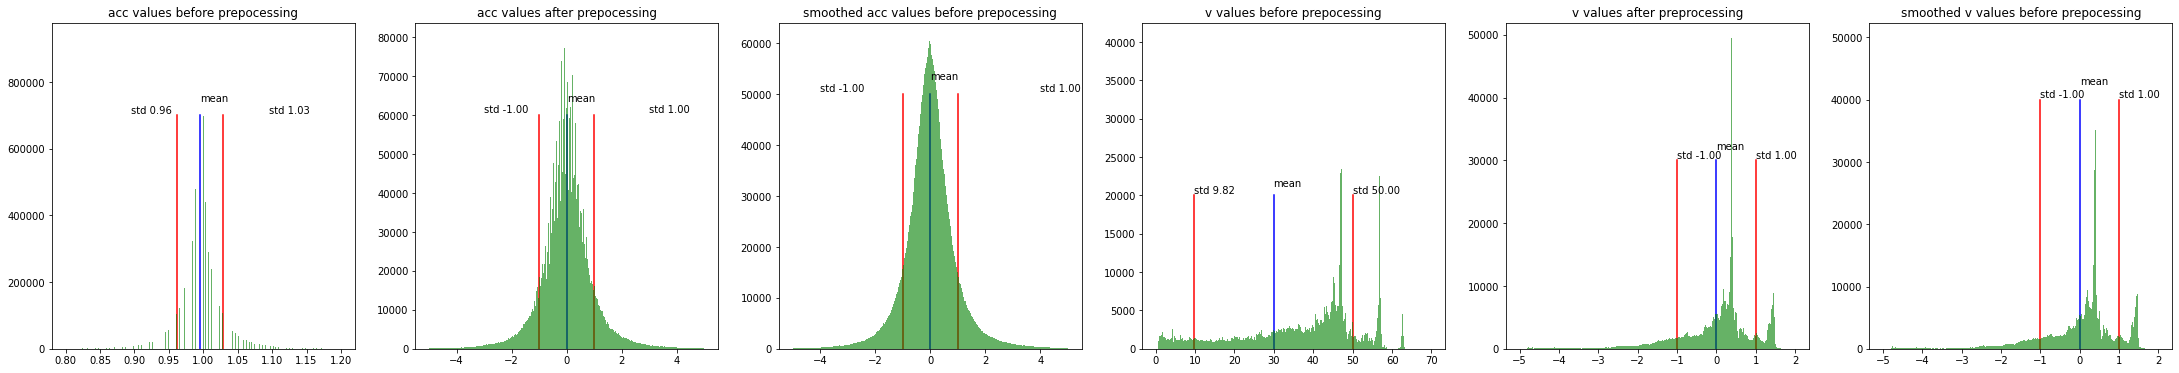

In [174]:
z_vals = np.concatenate(df_clean["z"].values).ravel()
v_vals = np.concatenate(df_clean["v"].values).ravel()
z_vals_smooth = np.concatenate(df_clean["z_smooth"].values).ravel()
v_vals_smooth = np.concatenate(df_clean["v_smooth"].values).ravel()
z_vals_original = np.concatenate(data["GM.acc.xyz.z"].values).ravel()
v_vals_original = np.concatenate(data["GM.obd.spd_veh.value"].values).ravel()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6,figsize=(38,6))
title_texts = ["acc values before prepocessing","acc values after prepocessing","smoothed acc values before prepocessing","v values before prepocessing","v values after preprocessing","smoothed v values before prepocessing"]
vals = [z_vals_original,z_vals,z_vals_smooth,v_vals_original,v_vals,v_vals_smooth]
y_max_vals=[700000,60000,50000,20000,30000,40000]
scale = [3,3,4,1,1,1]
ranges=[(0.8,1.2),(-5,5),(-5,5),(0.1,70),(-5,2),(-5,2)]

for i,axs in enumerate((ax1, ax2, ax3, ax4, ax5, ax6)):
    axs.hist(vals[i],bins=500, color="g",range=ranges[i],zorder=3,alpha=0.6)
    axs.set_title(title_texts[i])
    axs.plot([vals[i].mean()]*2,(0,y_max_vals[i]),color="b",zorder=2)
    axs.text(vals[i].mean(),y_max_vals[i]*1.06,"mean")
    axs.plot([vals[i].std()]*2+vals[i].mean(),(0,y_max_vals[i]),color="r",zorder=2)
    axs.text(vals[i].std()*scale[i]+vals[i].mean(),y_max_vals[i]*1.01,f"std {vals[i].std()+vals[i].mean():.2f}")
    axs.plot([-vals[i].std()]*2+vals[i].mean(),(0,y_max_vals[i]),color="r",zorder=2)
    axs.text(-vals[i].std()*scale[i]+vals[i].mean(),y_max_vals[i]*1.01,f"std {-vals[i].std()+vals[i].mean():.2f}")
    
    


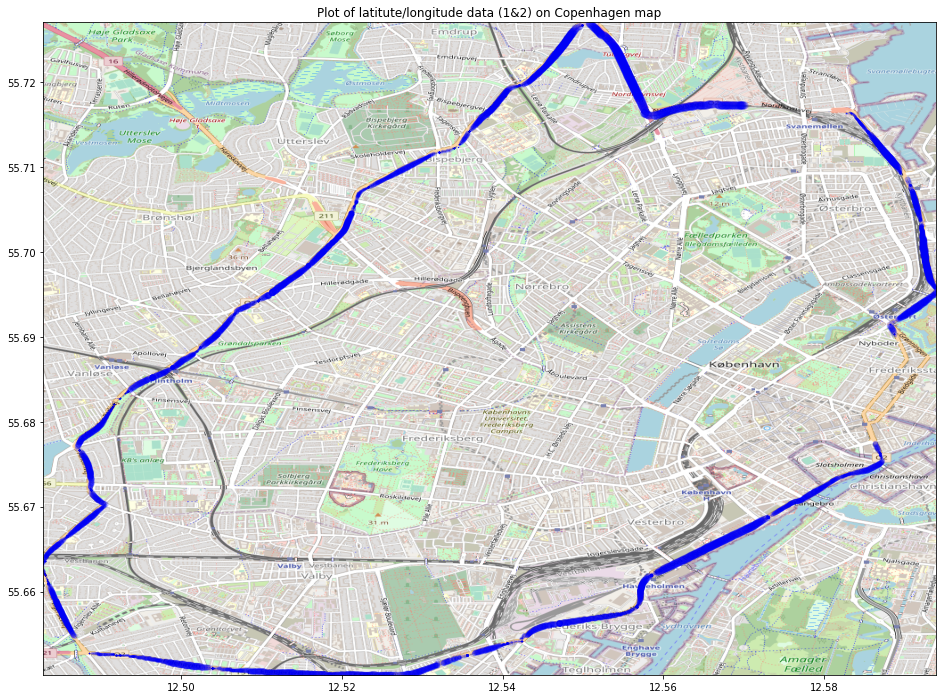

In [175]:
lats = np.concatenate(data["GM.lat_int"].values).ravel()
lons = np.concatenate(data["GM.lon_int"].values).ravel()

BBox = (np.min(lons),np.max(lons),      
        np.min(lats), np.max(lats))

track = plt.imread(drive_path + "map.png")


def get_mean(d):
  v_mean = list()
  for v in d.values:
    v_mean.append(v.mean())
  v_mean=np.array(v_mean)

  v_mean_scaled=(v_mean-v_mean.mean())/v_mean.std()
  v_mean_scaled-=v_mean_scaled.min()
  return np.array(v_mean_scaled)**3

v_mean = get_mean(data["GM.obd.spd_veh.value"])


fig, ax = plt.subplots(figsize=(16, 12))
for i in range(data["GM.lat_int"].values.shape[0]):
  ax.scatter(data["GM.lon_int"].values[i][::700], data["GM.lat_int"].values[i][::700],
            zorder=1, alpha= 0.1, c='b', s=v_mean[i])
  

ax.set_title('Plot of latitute/longitude data (1&2) on Copenhagen map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#ax.legend("Blue -> Data 0 \nGreen -> Data 1")
ax.imshow(track, zorder=0, extent = BBox, aspect= 'auto')